## NX31 Examproject

## Packages and extensions

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy as sp
from scipy import interpolate
import sympy as sm
from IPython.display import display
import ipywidgets as widgets

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
sm.init_printing(use_unicode=True)

## Introduction

This examproject is made by our own effort combined with inspiration from Problem sets, Lecture notebooks and earlier project. Also with a big amount of 'trial and error' and google searches. 

# Human capital accumulation

Consider a worker living in **two periods**, $t \in \{1,2\}$. 

In each period she decides whether to **work ($l_t = 1$) or not ($l_t = 0$)**. 

She can *not* borrow or save and thus **consumes all of her income** in each period. 

If she **works** her **consumption** becomes:

$$c_t = w h_t l_t\,\,\text{if}\,\,l_t=1$$

where $w$ is **the wage rate** and $h_t$ is her **human capital**. 

If she does **not work** her consumption becomes:

$$c_t = b\,\,\text{if}\,\,l_t=0$$

where $b$ is the **unemployment benefits**.

Her **utility of consumption** is: 

$$ \frac{c_t^{1-\rho}}{1-\rho} $$

Her **disutility of working** is:

$$ \gamma l_t $$

From period 1 to period 2, she **accumulates human capital** according to:

$$ h_2 = h_1 + l_1 + 
\begin{cases}
0 & \text{with prob. }0.5 \\
\Delta & \text{with prob. }0.5 
\end{cases} \\
$$

where $\Delta$ is a **stochastic experience gain**.

In the **second period** the worker thus solves:

$$
\begin{eqnarray*}
v_{2}(h_{2}) & = &\max_{l_{2}} \frac{c_2^{1-\rho}}{1-\rho} - \gamma l_2
\\ & \text{s.t.} & \\
c_{2}& = & w h_2 l_2 \\
l_{2}& \in &\{0,1\}
\\ & \text{ NEW - s.t.} & \\
c_{2}& = & \begin{cases}
w h_2 & 
\text{if }l_2 = 1  \\
b & \text{if }l_2 = 0 
\end{cases} \\
\end{eqnarray*}
$$

In the **first period** the worker thus solves:

$$
\begin{eqnarray*}
v_{1}(h_{1}) &=& \max_{l_{1}} \frac{c_1^{1-\rho}}{1-\rho} - \gamma l_1 + \beta\mathbb{E}_{1}\left[v_2(h_2)\right]
\\ & \text{s.t.} & \\
c_1 &=& w h_1 l_1 \\
h_2 &=& h_1 + l_1 + \begin{cases}
0 & \text{with prob. }0.5\\
\Delta & \text{with prob. }0.5 
\end{cases}\\
l_{1} &\in& \{0,1\}\\
\end{eqnarray*}
$$

where $\beta$ is the **discount factor** and $\mathbb{E}_{1}\left[v_2(h_2)\right]$ is the **expected value of living in period two**.

The **parameters** of the model are:

In [3]:
rho = 2
beta = 0.96
gamma = 0.1
w = 2
b = 1
Delta = 0.1

The **relevant levels of human capital** are:

In [4]:
h_vec = np.linspace(0.1,1.5,100)

**Question 1:** Solve the model in period 2 and illustrate the solution (including labor supply as a function of human capital). 

**Question 2:** Solve the model in period 1 and illustrate the solution (including labor supply as a function of human capital). 

**Question 3:** Will the worker never work if her potential wage income is lower than the unemployment benefits she can get? Explain and illustrate why or why not.

## **Answer 1**: Human capital accumulation

For the three question concerning Human capital accumulation have taking a lot of inspiration from Problem set 7.4.

Solving the model in period 2 and illustrating labor supply as a function of human capital.

First we set up the functions of the model, both for period one and period two.

In [5]:
def utility(c,rho):
    return c**(1-rho)/(1-rho)

def c(w,h,l,b):
    return w*h*l + b*(1-l)

def bequest(l,gamma):
    return gamma*l

def v2(w,h2,l2,b,rho,gamma):
    return utility(c(w,h2,l2,b),rho) - bequest(l2,gamma)

def v1(h1,l1,v2_interp,Delta,w,b,rho,gamma,beta):
    
    # a. v2 value, if no accumulation of humancapital
    h2_No = h1 + l1 + 0
    v2_No = v2_interp([h2_No])[0]
    
    # b. v2 value, if accumulation of human capital
    h2_Yes = h1 + l1 + Delta
    v2_Yes = v2_interp([h2_Yes])[0]
    
    # c. expected v2 value
    v2 = 0.5*v2_No + 0.5*v2_Yes
    
    # d. total value
    return utility(c(w,h1,l1,b),rho) - bequest(l1,gamma) + beta*v2

We now ready to solve Question 1.1.

### Question 1.1

Next we will define a function to solve the model for period 2.

In [6]:
def solve_period_2(rho,gamma,Delta):
    
    # Vectors
    l2_vec = np.empty(100)
    v2_vec = np.empty(100)
    
    # Solve for each h2
    for i,h2 in enumerate(h_vec):
        
        # to work or not to work; if utility is higher when not working, then you will not work, else you work
        if v2(w,h2,1,b,rho,gamma) < v2(w,h2,0,b,rho,gamma):
            l2_vec[i] = 0
        else:
            l2_vec[i] = 1
        
        v2_vec[i] = v2(w,h2,l2_vec[i],b,rho,gamma)
        
    return l2_vec, v2_vec

Using our vector for labor supply and vector utility for each value of human capital, we will solve and illustrate the solution.

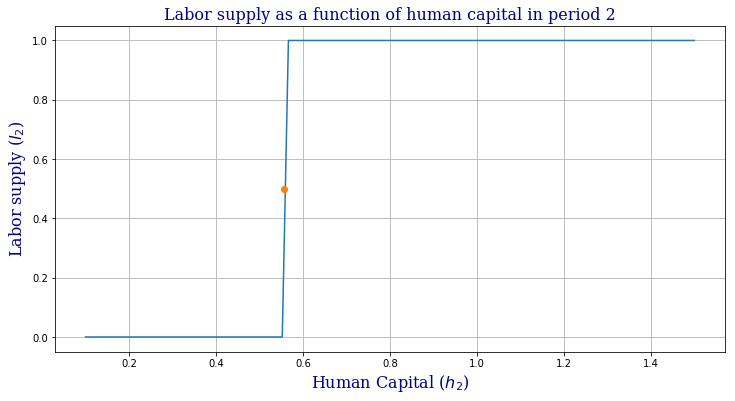

In [7]:
# Solving
l2_vec,v2_vec = solve_period_2(rho,gamma,Delta)

# Figure
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
ax.plot(h_vec,l2_vec)

# Labels
font = {'family':'serif','color':'darkblue','weight':'normal','size': 16,}
ax.set_xlabel('Human Capital ($h_2$)', fontdict=font)
ax.set_ylabel('Labor supply ($l_2$)', fontdict=font)
ax.set_title('Labor supply as a function of human capital in period 2', fontdict=font)
ax.grid()
ax.plot(0.5555555555555556,0.5,marker='o')

We see that with low human capital you will decide not to work in period two, in fact you will only work if your level of human capital is over 0.5556.

Below we have quickly found the kink in human capital with a short analytical solution.

In [8]:
# Symbols
w = sm.symbols('w')
h_2 = sm.symbols('h_2')
rho = sm.symbols('rho')
gamma = sm.symbols('gamma')
v21 = sm.symbols('v_{2, l=1}')
v20 = sm.symbols('v_{2, l=0}')
b = sm.symbols('b')

Utility when working:


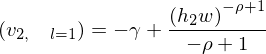

Utility whn not working:


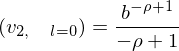

The kink in human capital is then where the two utilities are equal, so we set them equal and isolate h_2:


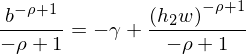

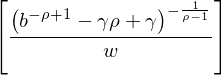

In [9]:
# Solves for the kink point in human capial i period 2
print(f'Utility when working:')
v_21 = (w*h_2*1)**(1-rho)/(1-rho)-gamma
display(sm.Eq(v21,v_21))
print(f'Utility whn not working:')
v_20 = b**(1-rho)/(1-rho)
display(sm.Eq(v20,v_20))
print(f'The kink in human capital is then where the two utilities are equal, so we set them equal and isolate h_2:')
display(sm.Eq(v_20,v_21))
f = v_21-v_20
fs = sm.solve(f,h_2)
fs

In [10]:
rho = 2
beta = 0.96
gamma = 0.1
w = 2
b = 1
[(b**(-rho + 1) - gamma*rho + gamma)**(-1/(rho - 1))/w]

This result match the illustration above.

### Question 1.2

We will now solve the model for period one.

In [11]:
def solve_period_1(rho,gamma,beta,Delta,v1,v2_interp):
    
    # Vectors
    l1_vec = np.empty(100)
    v1_vec = np.empty(100)
    
    # Solve for each h1
    for i,h1 in enumerate(h_vec):
             
        # to work or not to work; if utility is higher when not working, then you will not work, else you work
        if v1(h1,1,v2_interp,Delta,w,b,rho,gamma,beta) < v1(h1,0,v2_interp,Delta,w,b,rho,gamma,beta):
            l1_vec[i] = 0
        else:
            l1_vec[i] = 1
        
        v1_vec[i] = v1(h1,l1_vec[i],v2_interp,Delta,w,b,rho,gamma,beta)
        
    return l1_vec, v1_vec

# Construct interpolator
v2_interp = interpolate.RegularGridInterpolator((h_vec,), v2_vec, bounds_error=False, fill_value=None)

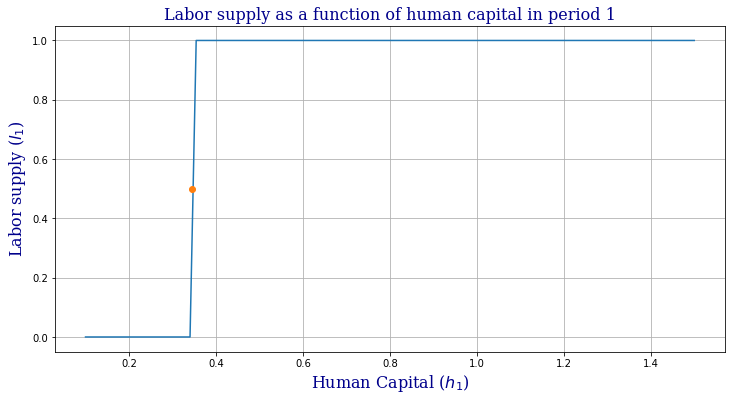

In [12]:
# Solving
l1_vec,v1_vec = solve_period_1(rho,gamma,beta,Delta,v1,v2_interp)

# Figure
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
ax.plot(h_vec,l1_vec)

# Labels
font = {'family':'serif','color':'darkblue','weight':'normal','size': 16,}
ax.set_xlabel('Human Capital ($h_1$)', fontdict=font)
ax.set_ylabel('Labor supply ($l_1$)', fontdict=font)
ax.set_title('Labor supply as a function of human capital in period 1', fontdict=font)
ax.grid()
ax.plot(0.345,0.5,marker='o') # guess

We see again that with low human capital you will decide not to work in period two, in fact you will only work if your level of human capital is over 0.345.

Below we have quickly found the kink in human capital with a short analytical solution.

In [13]:
# Symbols
w = sm.symbols('w')
h_1 = sm.symbols('h_1')
rho = sm.symbols('rho')
gamma = sm.symbols('gamma')
v11 = sm.symbols('v_{1, l=1}')
v10 = sm.symbols('v_{1, l=0}')
b = sm.symbols('b')
beta = sm.symbols('beta')
v2 = sm.symbols('E{[v_2]}')

Utility when working:


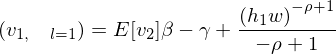

Utility whn not working:


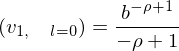

The kink in human capital is then where the two utilities are equal, so we set them equal and isolate h_2:


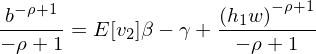

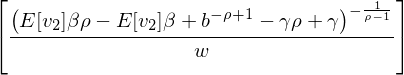

In [14]:
# Solves for the kink point in human capial i period 2
print(f'Utility when working:')
v_11 = (w*h_1*1)**(1-rho)/(1-rho)-gamma+beta*v2
display(sm.Eq(v11,v_11))
print(f'Utility whn not working:')
v_10 = b**(1-rho)/(1-rho)
display(sm.Eq(v10,v_10))
print(f'The kink in human capital is then where the two utilities are equal, so we set them equal and isolate h_2:')
display(sm.Eq(v_10,v_11))
f1 = v_11-v_10
f1s = sm.solve(f1,h_1)
f1s

In [15]:
# Breakeven human capital in period 2
rho = 2
beta = 0.96
gamma = 0.1
w = 2
b = 1
h2 = (b**(-rho + 1) - gamma*rho + gamma)**(-1/(rho - 1))/w
h2

In [16]:
#Expected v_2
v2 = (w*h2*1)**(1-rho)/(1-rho)-gamma
v2

In [17]:
# Breakeven human capital period 1
((v2*beta*rho - v2*beta + (b**(-rho + 1)) - gamma*rho + gamma)**(-1/(rho - 1)))/w

This does not look correct, but the illustration is.

### Question 1.3

To investigate if the worker never will work we change the solution for period 2 and period 1, so that labor supply will depend on the potential wage income. We chose the highest level of human capital, so that we capture all types of workers.

First we will solve for period 2.

In [18]:
rho = 2
beta = 0.96
gamma = 0.1
b = 1
Delta = 0.1

In [19]:
def utility(c,rho):
    return c**(1-rho)/(1-rho)

def c(w,h,l,b):
    return w*h*l + b*(1-l)

def bequest(l,gamma):
    return gamma*l

def v2(w,h2,l2,b,rho,gamma):
    return utility(c(w,h2,l2,b),rho) - bequest(l2,gamma)

def v1(h1,l1,v2_interp,Delta,w,b,rho,gamma,beta):
    
    # a. v2 value, if no accumulation of humancapital
    h2_No = h1 + l1 + 0
    v2_No = v2_interp([h2_No])[0]
    
    # b. v2 value, if accumulation of human capital
    h2_Yes = h1 + l1 + Delta
    v2_Yes = v2_interp([h2_Yes])[0]
    
    # c. expected v2 value
    v2 = 0.5*v2_No + 0.5*v2_Yes
    
    # d. total value
    return utility(c(w,h1,l1,b),rho) - bequest(l1,gamma) + beta*v2

The function for period 2 is no dependent on a vector of values for income wage from approximatly zero to three.

In [20]:
h2 = 1.5
w_vec = np.linspace(1e-8,2,100)

def solve_period_2_2(rho,gamma,Delta):
    
    # Vectors
    l2_vec = np.empty(100)
    v2_vec = np.empty(100)
    
    # Solve for each h2
    for i,w in enumerate(w_vec):
        
        # to work or not to work; if utility is higher when not working, then you will not work, else you work
        if v2(w,h2,1,b,rho,gamma) < v2(w,h2,0,b,rho,gamma):
            l2_vec[i] = 0
        else:
            l2_vec[i] = 1
        
        v2_vec[i] = v2(w,h2,l2_vec[i],b,rho,gamma)
        
    return l2_vec, v2_vec

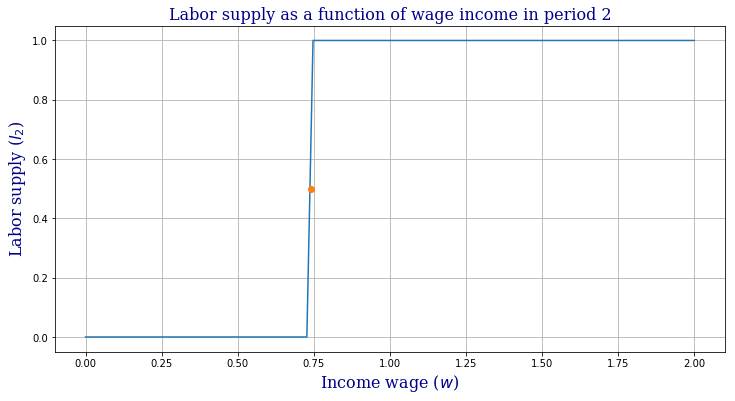

In [21]:
# Solving
l2_vec,v2_vec = solve_period_2_2(rho,gamma,Delta)

# Figure
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
ax.plot(w_vec,l2_vec)

# Labels
font = {'family':'serif','color':'darkblue','weight':'normal','size': 16,}
ax.set_xlabel('Income wage ($w$)', fontdict=font)
ax.set_ylabel('Labor supply ($l_2$)', fontdict=font)
ax.set_title('Labor supply as a function of wage income in period 2', fontdict=font)
ax.grid()
ax.plot(0.7407407407407408,0.5,marker='o')

If the wage is below 0.741 no one will work in periode 2, if the worker have a lower level of human capital, this limit will increase.

Because utility decrease with the level of human capital, the wage will have to increase for the worker to choose to work.

To find the exact limit value of income wage we have done a short analytical solution below.

In [22]:
# Symbols
w = sm.symbols('w')
h_2 = sm.symbols('h_2')
rho = sm.symbols('rho')
gamma = sm.symbols('gamma')
v21 = sm.symbols('v_{2, l=1}')
v20 = sm.symbols('v_{2, l=0}')
b = sm.symbols('b')

Utility when working:


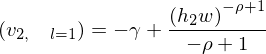

Utility whn not working:


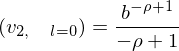

The kink in income wage is then where the two utilities are equal, so we set them equal and isolate w:


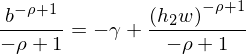

[(b**(-rho + 1) - gamma*rho + gamma)**(-1/(rho - 1))/h_2]


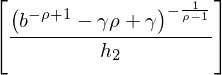

In [23]:
# Solves for the kink point in income wage i period 2
print(f'Utility when working:')
v_21 = (w*h_2*1)**(1-rho)/(1-rho)-gamma
display(sm.Eq(v21,v_21))
print(f'Utility whn not working:')
v_20 = b**(1-rho)/(1-rho)
display(sm.Eq(v20,v_20))
print(f'The kink in income wage is then where the two utilities are equal, so we set them equal and isolate w:')
display(sm.Eq(v_20,v_21))
f = v_21-v_20
fs = sm.solve(f,w)
print(fs)
fs

In [24]:
rho = 2
beta = 0.96
gamma = 0.1
h_2 = 1.5
b = 1
[(b**(-rho + 1) - gamma*rho + gamma)**(-1/(rho - 1))/h_2]

Now we will solve for period 1, using the same the same procedure as above.

In [25]:
h1 = 1.5

def solve_period_1_2(rho,gamma,beta,Delta,v1,v2_interp):
    
    # Vectors
    l1_vec = np.empty(100)
    v1_vec = np.empty(100)
    
    # Solve for each h1
    for i,w in enumerate(w_vec):
             
        # to work or not to work; if utility is higher when not working, then you will not work, else you work
        if v1(h1,1,v2_interp,Delta,w,b,rho,gamma,beta) < v1(h1,0,v2_interp,Delta,w,b,rho,gamma,beta):
            l1_vec[i] = 0
        else:
            l1_vec[i] = 1
        
        v1_vec[i] = v1(h1,l1_vec[i],v2_interp,Delta,w,b,rho,gamma,beta)
        
    return l1_vec, v1_vec

# Construct interpolator
v2_interp = interpolate.RegularGridInterpolator((w_vec,), v2_vec, bounds_error=False, fill_value=None)

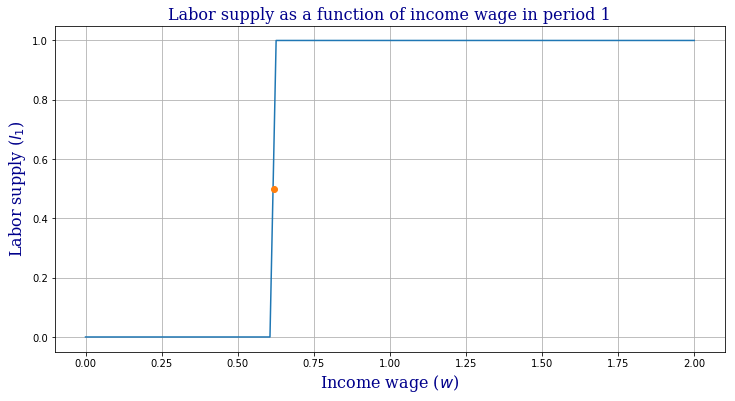

In [26]:
# Solving
l1_vec,v1_vec = solve_period_1_2(rho,gamma,beta,Delta,v1,v2_interp)

# Figure
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
ax.plot(w_vec,l1_vec)

# Labels
font = {'family':'serif','color':'darkblue','weight':'normal','size': 16,}
ax.set_xlabel('Income wage ($w$)', fontdict=font)
ax.set_ylabel('Labor supply ($l_1$)', fontdict=font)
ax.set_title('Labor supply as a function of income wage in period 1', fontdict=font)
ax.grid()
ax.plot(0.619,0.5,marker='o') # guess

In [27]:
# Symbols
w = sm.symbols('w')
h_1 = sm.symbols('h_1')
rho = sm.symbols('rho')
gamma = sm.symbols('gamma')
v11 = sm.symbols('v_{1, l=1}')
v10 = sm.symbols('v_{1, l=0}')
b = sm.symbols('b')
beta = sm.symbols('beta')
v2 = sm.symbols('E{[v_2]}')

Utility when working:


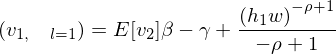

Utility whn not working:


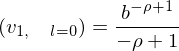

The kink in human capital is then where the two utilities are equal, so we set them equal and isolate h_2:


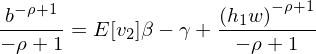

[(E{[v_2]}*beta*rho - E{[v_2]}*beta + b**(-rho + 1) - gamma*rho + gamma)**(-1/(rho - 1))/h_1]


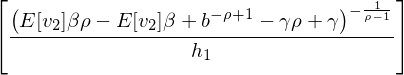

In [28]:
# Solves for the kink point in human capial i period 2
print(f'Utility when working:')
v_11 = (w*h_1*1)**(1-rho)/(1-rho)-gamma+beta*v2
display(sm.Eq(v11,v_11))
print(f'Utility whn not working:')
v_10 = b**(1-rho)/(1-rho)
display(sm.Eq(v10,v_10))
print(f'The kink in human capital is then where the two utilities are equal, so we set them equal and isolate h_2:')
display(sm.Eq(v_10,v_11))
f1 = v_11-v_10
f1s = sm.solve(f1,w)
print(f1s)
f1s

In [29]:
rho = 2
beta = 0.96
gamma = 0.1
h2 = 1.5
b = 1
w = (b**(-rho + 1) - gamma*rho + gamma)**(-1/(rho - 1))/h2
w

In [30]:
#Expected v_2
v2 = (w*h2*1)**(1-rho)/(1-rho)-gamma
v2

In [31]:
h1 = 1.5
[(v2*beta*rho - v2*beta + b**(-rho + 1) - gamma*rho + gamma)**(-1/(rho - 1))/h1]

Again, this is not corret, but the illustration above is correct, and show the level of income wage where no one will work.

# AS-AD model

Consider the following **AS-AD model**. The **goods market equilibrium** is given by

$$ y_{t} = -\alpha r_{t} + v_{t} $$

where $y_{t}$ is the **output gap**, $r_{t}$ is the **ex ante real interest** and $v_{t}$ is a **demand disturbance**. 

The central bank's **Taylor rule** is

$$ i_{t} = \pi_{t+1}^{e} + h \pi_{t} + b y_{t}$$

where $i_{t}$ is the **nominal interest rate**, $\pi_{t}$ is the **inflation gap**, and $\pi_{t+1}^{e}$ is the **expected inflation gap**. 

The **ex ante real interest rate** is given by 

$$ r_{t} = i_{t} - \pi_{t+1}^{e} $$

Together, the above implies that the **AD-curve** is

$$ \pi_{t} = \frac{1}{h\alpha}\left[v_{t} - (1+b\alpha)y_{t}\right]$$

Further, assume that the **short-run supply curve (SRAS)** is given by

$$ \pi_{t} = \pi_{t}^{e} + \gamma y_{t} + s_{t}$$

where $s_t$ is a **supply disturbance**.

**Inflation expectations are adaptive** and given by

$$ \pi_{t}^{e} = \phi\pi_{t-1}^{e} + (1-\phi)\pi_{t-1}$$

Together, this implies that the **SRAS-curve** can also be written as

$$ \pi_{t} = \pi_{t-1} + \gamma y_{t} - \phi\gamma y_{t-1} + s_{t} - \phi s_{t-1} $$

The **parameters** of the model are:

In [32]:
par = {}

par['alpha'] = 5.76
par['h'] = 0.5
par['b'] = 0.5
par['phi'] = 0
par['gamma'] = 0.075

**Question 1:** Use the ``sympy`` module to solve for the equilibrium values of output, $y_t$, and inflation, $\pi_t$, (where AD = SRAS) given the parameters ($\alpha$, $h$, $b$, $\alpha$, $\gamma$) and $y_{t-1}$ , $\pi_{t-1}$, $v_t$, $s_t$, and $s_{t-1}$.

**Question 2:** Find and illustrate the equilibrium when $y_{t-1} = \pi_{t-1} = v_t = s_t = s_{t-1} = 0$. Illustrate how the equilibrium changes when instead $v_t = 0.1$.

**Persistent disturbances:** Now, additionaly, assume that both the demand and the supply disturbances are AR(1) processes

$$ v_{t} = \delta v_{t-1} + x_{t} $$
$$ s_{t} = \omega s_{t-1} + c_{t} $$

where $x_{t}$ is a **demand shock**, and $c_t$ is a **supply shock**. The **autoregressive parameters** are:

In [33]:
par['delta'] = 0.80
par['omega'] = 0.15

**Question 3:** Starting from $y_{-1} = \pi_{-1} = s_{-1} = 0$, how does the economy evolve for $x_0 = 0.1$, $x_t = 0, \forall t > 0$ and $c_t = 0, \forall t \geq 0$?

**Stochastic shocks:** Now, additionally, assume that $x_t$ and $c_t$ are stochastic and normally distributed

$$ x_{t}\sim\mathcal{N}(0,\sigma_{x}^{2}) $$
$$ c_{t}\sim\mathcal{N}(0,\sigma_{c}^{2}) $$

The **standard deviations of the shocks** are:

In [34]:
par['sigma_x'] = 3.492
par['sigma_c'] = 0.2

**Question 4:** Simulate the AS-AD model for 1,000 periods. Calculate the following five statistics:

1. Variance of $y_t$, $var(y_t)$
2. Variance of $\pi_t$, $var(\pi_t)$
3. Correlation between $y_t$ and $\pi_t$, $corr(y_t,\pi_t)$
4. Auto-correlation between $y_t$ and $y_{t-1}$, $corr(y_t,y_{t-1})$
5. Auto-correlation between $\pi_t$ and $\pi_{t-1}$, $corr(\pi_t,\pi_{t-1})$

**Question 5:** Plot how the correlation between $y_t$ and $\pi_t$ changes with $\phi$. Use a numerical optimizer or root finder to choose $\phi\in(0,1)$ such that the simulated correlation between $y_t$ and $\pi_t$ comes close to 0.31. 

**Quesiton 6:** Use a numerical optimizer to choose $\sigma_x>0$, $\sigma_c>0$ and $\phi\in(0,1)$ to make the simulated statistics as close as possible to US business cycle data where:

1. $var(y_t) = 1.64$
2. $var(\pi_t) = 0.21$
3. $corr(y_t,\pi_t) = 0.31$
4. $corr(y_t,y_{t-1}) = 0.84$
5. $corr(\pi_t,\pi_{t-1}) = 0.48$

# Exchange economy

Consider an **exchange economy** with

1. 3 goods, $(x_1,x_2,x_3)$
2. $N$ consumers indexed by \\( j \in \{1,2,\dots,N\} \\)
3. Preferences are Cobb-Douglas with log-normally distributed coefficients

    $$ \begin{eqnarray*}
    u^{j}(x_{1},x_{2},x_{3}) &=& 
    \left(x_{1}^{\beta_{1}^{j}}x_{2}^{\beta_{2}^{j}}x_{3}^{\beta_{3}^{j}}\right)^{\gamma}\\
     &  & \,\,\,\beta_{i}^{j}=\frac{\alpha_{i}^{j}}{\alpha_{1}^{j}+\alpha_{2}^{j}+\alpha_{3}^{j}} \\
     &  & \,\,\,\boldsymbol{\alpha}^{j}=(\alpha_{1}^{j},\alpha_{2}^{j},\alpha_{3}^{j}) \\ 
     &  & \,\,\,\log(\boldsymbol{\alpha}^j) \sim \mathcal{N}(\mu,\Sigma) \\
    \end{eqnarray*} $$

4. Endowments are exponentially distributed,

$$
\begin{eqnarray*}
\boldsymbol{e}^{j} &=& (e_{1}^{j},e_{2}^{j},e_{3}^{j}) \\
 &  & e_i^j \sim f, f(z;\zeta) =  1/\zeta \exp(-z/\zeta)
\end{eqnarray*}
$$

Let $p_3 = 1$ be the **numeraire**. The implied **demand functions** are:

$$
\begin{eqnarray*}
x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j})&=&\beta^{j}_i\frac{I^j}{p_{i}} \\
\end{eqnarray*}
$$

where consumer $j$'s income is

$$I^j = p_1 e_1^j + p_2 e_2^j +p_3 e_3^j$$

The **parameters** and **random preferences and endowments** are given by:

In [35]:
# a. parameters
N = 50000
mu = np.array([3,2,1])
Sigma = np.array([[0.25, 0, 0], [0, 0.25, 0], [0, 0, 0.25]])
gamma = 0.8
zeta = 1

# b. random draws
seed = 1986
np.random.seed(seed)

# preferences
alphas = np.exp(np.random.multivariate_normal(mu, Sigma, size=N))
betas = alphas/np.reshape(np.sum(alphas,axis=1),(N,1))

# endowments
e1 = np.random.exponential(zeta,size=N)
e2 = np.random.exponential(zeta,size=N)
e3 = np.random.exponential(zeta,size=N)

**Question 1:** Plot the histograms of the budget shares for each good across agents.

Consider the **excess demand functions:**

$$ z_i(p_1,p_2) = \sum_{j=1}^N x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j}) - e_i^j$$

**Question 2:** Plot the excess demand functions.

**Quesiton 3:** Find the Walras-equilibrium prices, $(p_1,p_2)$, where both excess demands are (approximately) zero, e.g. by using the following tâtonnement process:

1. Guess on $p_1 > 0$, $p_2 > 0$ and choose tolerance $\epsilon > 0$ and adjustment aggressivity parameter, $\kappa > 0$.
2. Calculate $z_1(p_1,p_2)$ and $z_2(p_1,p_2)$.
3. If $|z_1| < \epsilon$ and $|z_2| < \epsilon$ then stop.
4. Else set $p_1 = p_1 + \kappa \frac{z_1}{N}$ and $p_2 = p_2 + \kappa \frac{z_2}{N}$ and return to step 2.

**Question 4:** Plot the distribution of utility in the Walras-equilibrium and calculate its mean and variance.

**Question 5:** Find the Walras-equilibrium prices if instead all endowments were distributed equally. Discuss the implied changes in the distribution of utility. Does the value of $\gamma$ play a role for your conclusions?

## **Answer 3**: Exchange economy

### Question 3.1

"

**Question 1:** Plot the histograms of the budget shares for each good across agents.

"

We see from the demand function that the budget shares are the betas, we take a look at them below.

In [36]:
print(betas)
print(betas.shape)
print(type(betas))

[[0.53104511 0.30693723 0.16201766]
 [0.50866997 0.4162364  0.07509363]
 [0.83317207 0.07722226 0.08960567]
 ...
 [0.63725404 0.22027742 0.14246854]
 [0.78205036 0.11988119 0.09806844]
 [0.65552751 0.24728801 0.09718448]]
(50000, 3)
<class 'numpy.ndarray'>


We have three columns in for each good, below we plot them as histograms.

Text(0.5, 1.0, 'Good 3')

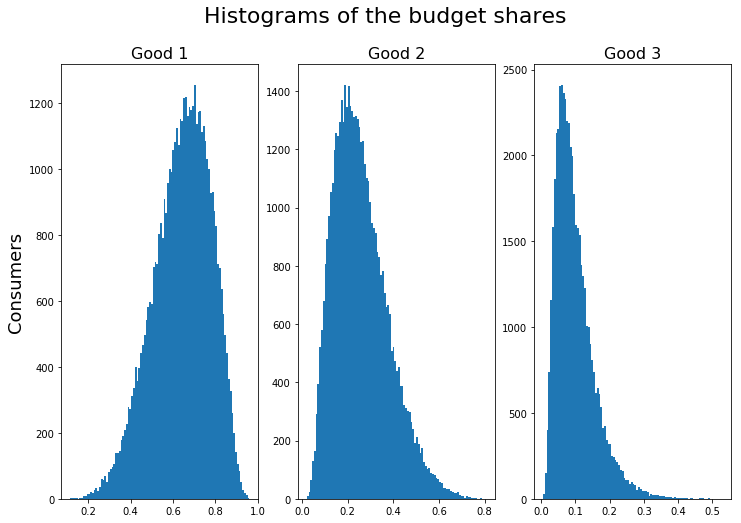

In [37]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.hist(betas[:,0], bins=100)
ax2.hist(betas[:,1], bins=100)
ax3.hist(betas[:,2], bins=100)

fig.suptitle('Histograms of the budget shares', fontsize=22)
ax1.set_ylabel('Consumers', fontsize=18)
ax1.set_title('Good 1', fontsize=16)
ax2.set_title('Good 2', fontsize=16)
ax3.set_title('Good 3', fontsize=16)

### Question 3.2

"

Consider the **excess demand functions:**

$$ z_i(p_1,p_2) = \sum_{j=1}^N x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j}) - e_i^j$$

**Question 2:** Plot the excess demand functions.

"

In the next couple of questions a lot of the inspiration came from Problem set 2, Problem set 7.4 (again) and lecture notebook 4.

First we define the demand functions and excess demand functions for each good.

In [38]:
# demand functions
def demand_good_1_func(betas,p1,p2,e1,e2,e3):
    I = p1*e1+p2*e2+e3
    return betas[:,0]*(I/p1)

def demand_good_2_func(betas,p1,p2,e1,e2,e3):
    I = p1*e1+p2*e2+e3
    return betas[:,1]*(I/p2)

def demand_good_3_func(betas,p1,p2,e1,e2,e3):
    I = p1*e1+p2*e2+e3
    return betas[:,2]*(I)

# excess demand functions
def excess_demand_good_1_func(betas,p1,p2,e1,e2,e3):
    
    # demand
    demand = np.sum(demand_good_1_func(betas,p1,p2,e1,e2,e3))
    
    # supply
    supply = np.sum(e1)
    
    # excess demand
    excess_demand = demand-supply
    
    return excess_demand

def excess_demand_good_2_func(betas,p1,p2,e1,e2,e3):
    
    # demand
    demand = np.sum(demand_good_2_func(betas,p1,p2,e1,e2,e3))
    
    # supply
    supply = np.sum(e2)
    
    # excess demand
    excess_demand = demand-supply
    
    return excess_demand

def excess_demand_good_3_func(betas,p1,p2,e1,e2,e3):
    
    # demand
    demand = np.sum(demand_good_3_func(betas,p1,p2,e1,e2,e3))
    
    # supply
    supply = np.sum(e3)
    
    # excess demand
    excess_demand = demand-supply
    
    return excess_demand

To plot the excess demand function for good 1 and good 2, we first define a price vector for each good, and set up grids for the prices and endowments.

In [39]:
p1_vec = np.linspace(0.1,10,100)
p2_vec = np.linspace(0.1,10,100)
e1_grid = np.empty((100,100))
e2_grid = np.empty((100,100))

p1_grid,p2_grid = np.meshgrid(p1_vec,p2_vec,indexing='ij')

for i,p1 in enumerate(p1_vec):
    for j,p2 in enumerate(p2_vec):
        e1_grid[i,j] = excess_demand_good_1_func(betas,p1,p2,e1,e2,e3)
        e2_grid[i,j] = excess_demand_good_2_func(betas,p1,p2,e1,e2,e3)

We can not plot the two excess demand functions for good 1 and good 2.

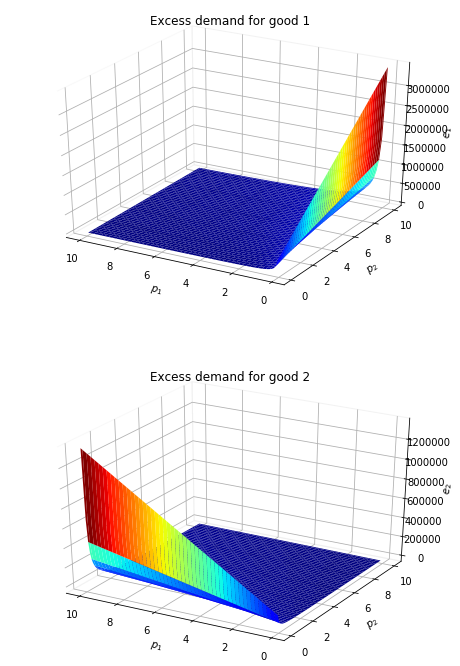

In [40]:
fig = plt.figure(figsize=(8,12))
ax = fig.add_subplot(2,1,1,projection='3d')
cs = ax.plot_surface(p1_grid,p2_grid,e1_grid,cmap=cm.jet)
ax.invert_xaxis()
ax.set_xlabel('$p_1$')
ax.set_ylabel('$p_2$')
ax.set_zlabel('$e_1$')
ax.set_title('Excess demand for good 1')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax1 = fig.add_subplot(2,1,2,projection='3d')
cs1 = ax1.plot_surface(p1_grid,p2_grid,e2_grid,cmap=cm.jet)
ax1.invert_xaxis()
ax1.set_xlabel('$p_1$')
ax1.set_ylabel('$p_2$')
ax1.set_zlabel('$e_2$')
ax1.set_title('Excess demand for good 2')
ax1.xaxis.pane.fill = False
ax1.yaxis.pane.fill = False
ax1.zaxis.pane.fill = False

### Question 3.3

"

**Quesiton 3:** Find the Walras-equilibrium prices, $(p_1,p_2)$, where both excess demands are (approximately) zero, e.g. by using the following tâtonnement process:

1. Guess on $p_1 > 0$, $p_2 > 0$ and choose tolerance $\epsilon > 0$ and adjustment aggressivity parameter, $\kappa > 0$.
2. Calculate $z_1(p_1,p_2)$ and $z_2(p_1,p_2)$.
3. If $|z_1| < \epsilon$ and $|z_2| < \epsilon$ then stop.
4. Else set $p_1 = p_1 + \kappa \frac{z_1}{N}$ and $p_2 = p_2 + \kappa \frac{z_2}{N}$ and return to step 2.

"

In [44]:
# equilibrium function
def find_equilibrium(betas,p1,p2,p3,e1,e2,e3,kappa=1/3,eps=1e-8,maxiter=50000):
    
    t = 0
    while True:
        
        # excess demand
        Z1 = excess_demand_good_1_func(betas,p1,p2,e1,e2,e3)
        Z2 = excess_demand_good_2_func(betas,p1,p2,e1,e2,e3)
        
        # stop?
        if (np.abs(Z1) < eps or np.abs(Z2) < eps) or t >= maxiter:
            print(f'{t:3d}: p1 = {p1:12.8f} -> excess demand -> {Z1:14.8f}')
            print(f'{t:3d}: p2 = {p2:12.8f} -> excess demand -> {Z2:14.8f}')
            break
        
        # updata p1 and p2
        p1 = p1 + kappa*Z1/betas.size
        p2 = p2 + kappa*Z2/betas.size
        
        # return
        if t < 5 or t%2500 == 0:
            print(f'{t:3d}: p1 = {p1:12.8f} -> excess demand -> {Z1:14.8f}')
            print(f'{t:3d}: p2 = {p2:12.8f} -> excess demand -> {Z2:14.8f}')
        elif t == 5:
            print ('    ...')
        
        t += 1
    
    return p1, p2

# find equilibrium function
p1 = 0.1
p2 = 0.1
p3 = 1
kappa = 1/3
eps = 1e-8
p1,p2 = find_equilibrium(betas,p1,p2,p3,e1,e2,e3,kappa=kappa,eps=eps)

  0: p1 =   0.84706893 -> excess demand -> 336181.01951616
  0: p2 =   0.33541024 -> excess demand -> 105934.60974196
  1: p1 =   0.92002529 -> excess demand -> 32830.36104802
  1: p2 =   0.41176263 -> excess demand -> 34358.57449565
  2: p1 =   0.98994196 -> excess demand -> 31462.49945650
  2: p2 =   0.46382658 -> excess demand -> 23428.77726877
  3: p1 =   1.05585304 -> excess demand -> 29659.98673866
  3: p2 =   0.50515723 -> excess demand -> 18598.79056957
  4: p1 =   1.11795291 -> excess demand -> 27944.94315230
  4: p2 =   0.54013175 -> excess demand -> 15738.53340450
    ...
2500: p1 =   6.47516423 -> excess demand ->    13.65273608
2500: p2 =   2.61113877 -> excess demand ->     5.09337135
5000: p1 =   6.48996244 -> excess demand ->     0.08480303
5000: p2 =   2.61665942 -> excess demand ->     0.03163643
7500: p1 =   6.49005457 -> excess demand ->     0.00052913
7500: p2 =   2.61669378 -> excess demand ->     0.00019739
10000: p1 =   6.49005514 -> excess demand ->     0.00000

In [42]:
Z1 = excess_demand_good_1_func(betas,p1,p2,e1,e2,e3)
Z2 = excess_demand_good_2_func(betas,p1,p2,e1,e2,e3)
print(Z1,Z2)
assert(np.abs(Z1) < 1e-5)
assert(np.abs(Z2) < 1e-5)
print(p1)
print(p2)

2.6768248062580824e-08 9.989889804273844e-09
6.490055145458296
2.6166940004707353


### Question 3.4

"

**Question 4:** Plot the distribution of utility in the Walras-equilibrium and calculate its mean and variance.

"

### Question 3.5

"

**Question 5:** Find the Walras-equilibrium prices if instead all endowments were distributed equally. Discuss the implied changes in the distribution of utility. Does the value of $\gamma$ play a role for your conclusions?

"